# Template Matching

In [1]:
import numpy as np
import cv2
import warnings
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")

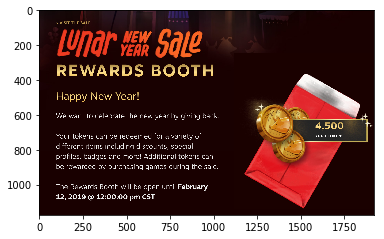

In [7]:
full = cv2.imread("sub.png")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

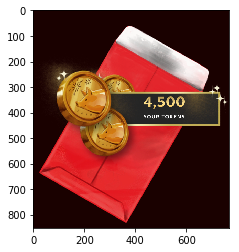

In [6]:
# upload template(part) image
part = cv2.imread("main.png")
part = cv2.cvtColor(part, cv2.COLOR_BGR2RGB)
plt.imshow(part)

## Run different template matching methods

In the heatmap, the brighter the color is the more the template will be matched in the full image

In [8]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

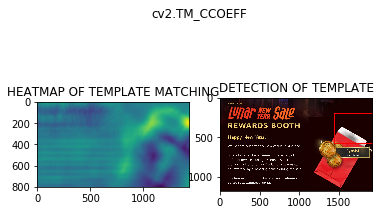

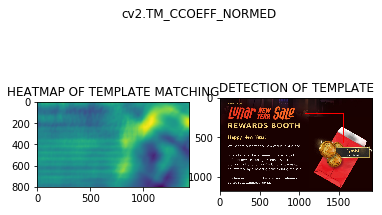

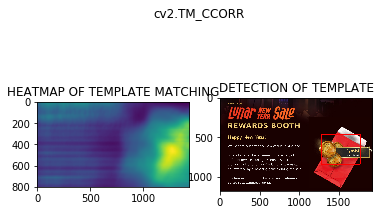

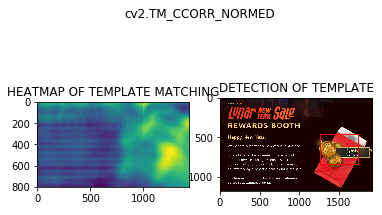

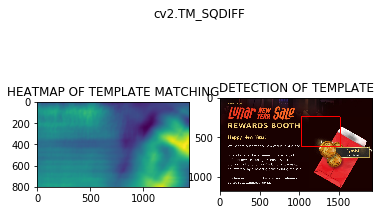

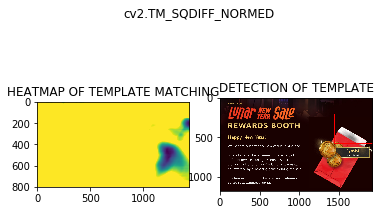

In [9]:
for m in methods:
    # create a copy image
    full_copy = full.copy()
    
    method = eval(m)
    
    # template matching
    res = cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    height, width, channel = face.shape
    
    # to figure out teh rectangle size
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, color=(255,0,0),thickness=10)
    
    # plot and show the image
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    plt.suptitle(m)
    
    plt.show()
    
    print('\n\n')